In [17]:
import wget

url='https://bit.ly/fruits_300_data'
wget.download(url)

In [18]:
import numpy as np

fruits=np.load('fruits_300_data')
print(fruits.shape)

(300, 100, 100)


True

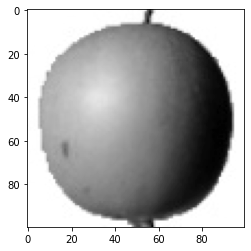

In [19]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(fruits[0],cmap='gray_r')
plt.savefig('pltfruits0.png') #432*288, predict 불가능

cv2.imwrite('cvfruits0.jpg',fruits[100])#100*100, predict 가능

In [20]:
from sklearn.cluster import KMeans

fruits_2d=fruits.reshape(-1,10000)
km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [21]:
predvalue=km.predict([fruits_2d[0]])
print(predvalue)

[2]


In [22]:
a=cv2.imread('cvfruits0.jpg',cv2.IMREAD_GRAYSCALE)
print(a.shape)

(100, 100)


In [23]:
pred=km.predict(a.reshape(-1,10000))
print(pred)

[0]


In [24]:
from sklearn.linear_model import LogisticRegression

target=np.array(['사과']*100+['파인애플']*100+['바나나']*100)
print(target.shape)
print(target[:5])
print(target[100:105])
print(target[200:205])

(300,)
['사과' '사과' '사과' '사과' '사과']
['파인애플' '파인애플' '파인애플' '파인애플' '파인애플']
['바나나' '바나나' '바나나' '바나나' '바나나']


In [25]:
lr=LogisticRegression()
lr.fit(fruits_2d,target)

LogisticRegression()

In [27]:
pred=lr.predict(fruits_2d[0].reshape(-1,10000))
print(pred)
pred=lr.predict(fruits_2d[100].reshape(-1,10000))
print(pred)
pred=lr.predict(fruits_2d[200].reshape(-1,10000))
print(pred)

['사과']
['파인애플']
['바나나']


In [28]:
pred=lr.predict(a.reshape(-1,10000))
print(pred)

['파인애플']
